<a href="https://colab.research.google.com/github/shank10/CV/blob/master/transfervgg16_to_10monkeys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle
from google.colab import files
#Upload kaggle.json
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sshekharatagora","key":"60a036635504a690cd7aa6fc66de17b0"}'}

In [ ]:
!mkdir ~/.kaggle 
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d slothkong/10-monkey-species

 98% 537M/547M [00:27<00:00, 16.6MB/s]
100% 547M/547M [00:27<00:00, 20.8MB/s]


In [ ]:
!unzip 10-monkey-species.zip

Archive:  10-monkey-species.zip
  inflating: monkey_labels.txt       
  inflating: training/training/n0/n0018.jpg  
  inflating: training/training/n0/n0019.jpg  
  inflating: training/training/n0/n0020.jpg  
  inflating: training/training/n0/n0021.jpg  
  inflating: training/training/n0/n0022.jpg  
  inflating: training/training/n0/n0023.jpg  
  inflating: training/training/n0/n0024.jpg  
  inflating: training/training/n0/n0025.jpg  
  inflating: training/training/n0/n0026.jpg  
  inflating: training/training/n0/n0027.jpg  
  inflating: training/training/n0/n0028.jpg  
  inflating: training/training/n0/n0029.jpg  
  inflating: training/training/n0/n0030.jpg  
  inflating: training/training/n0/n0031.jpg  
  inflating: training/training/n0/n0032.jpg  
  inflating: training/training/n0/n0033.jpg  
  inflating: training/training/n0/n0034.jpg  
  inflating: training/training/n0/n0035.jpg  
  inflating: training/training/n0/n0036.jpg  
  inflating: training/training/n0/n0037.jpg  
  inflatin

In [ ]:
!cat monkey_labels.txt

Label,  Latin Name           , Common Name                   , Train Images , Validation Images
n0   , alouatta_palliata	 , mantled_howler                , 131          , 26
n1   , erythrocebus_patas	 , patas_monkey                  , 139          , 28
n2   , cacajao_calvus	     , bald_uakari                   , 137          , 27
n3   , macaca_fuscata	     , japanese_macaque              , 152          , 30
n4   , cebuella_pygmea	     , pygmy_marmoset                , 131          , 26
n5   , cebus_capucinus	     , white_headed_capuchin         , 141          , 28
n6   , mico_argentatus	     , silvery_marmoset              , 132          , 26
n7   , saimiri_sciureus	     , common_squirrel_monkey        , 142          , 28
n8   , aotus_nigriceps	     , black_headed_night_monkey     , 133          , 27
n9   , trachypithecus_johnii , nilgiri_langur                , 132          , 26














In [ ]:
!pip install tf

  Created wheel for tf: filename=tf-1.0.0-cp36-none-any.whl size=1285 sha256=8c659c8acac9afad55af89fcfdb55234beab0744a1723cb1705c1cd05e13f606
  Stored in directory: /root/.cache/pip/wheels/7c/51/42/b034446bd6c8252825a1a0e7799b6ff633de376967db5ed5a6
Successfully built tf


In [ ]:
import matplotlib.pyplot as plt
from IPython.display import Image, display
import numpy as np
from os import listdir
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [ ]:
raw = pd.read_csv("./monkey_labels.txt", skipinitialspace=True)
raw = raw.rename(columns=lambda x: x.strip())

In [ ]:
labels = pd.DataFrame()
labels["id"] = raw["Label"].str.strip()
labels["name"] = raw["Common Name"].str.strip()
all_ids = labels["id"]
train_dir = 'training/training/'
validation_dir = 'validation/validation'

BATCH_SIZE = 32
IMG_SIZE = (300, 300)

Labels is n0


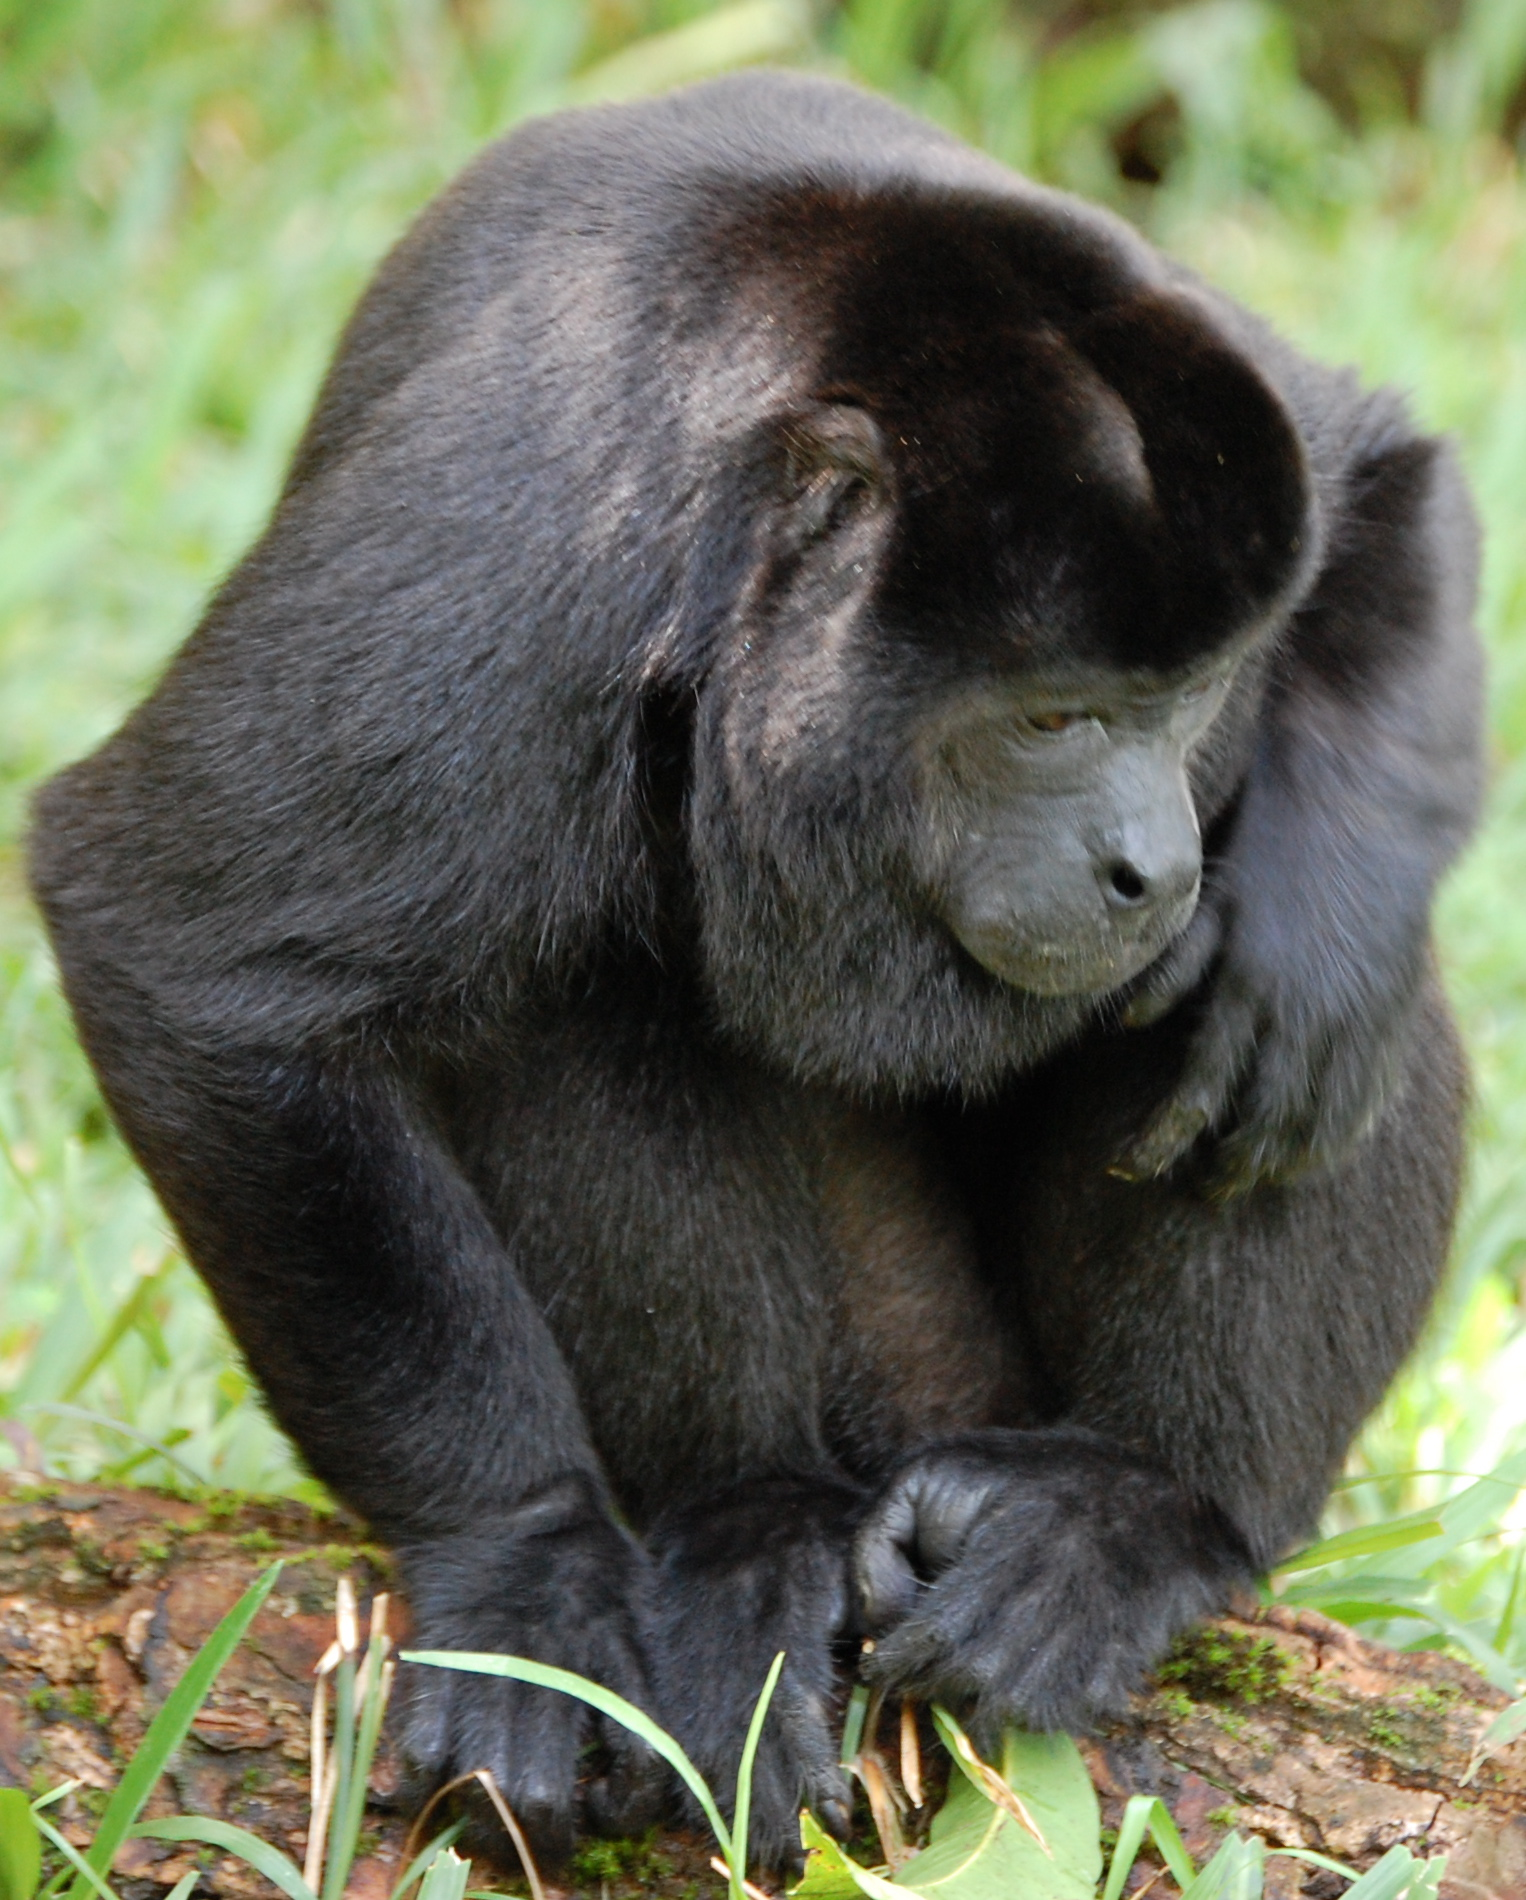

Labels is n1


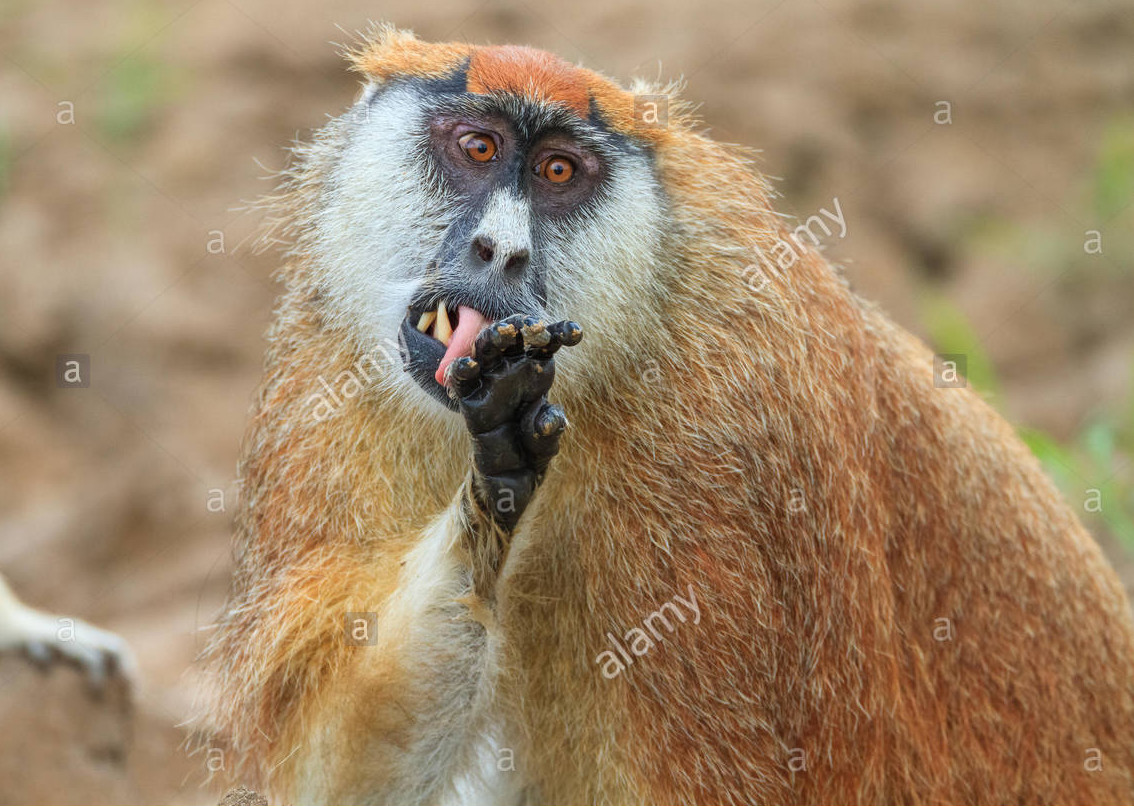

Labels is n2


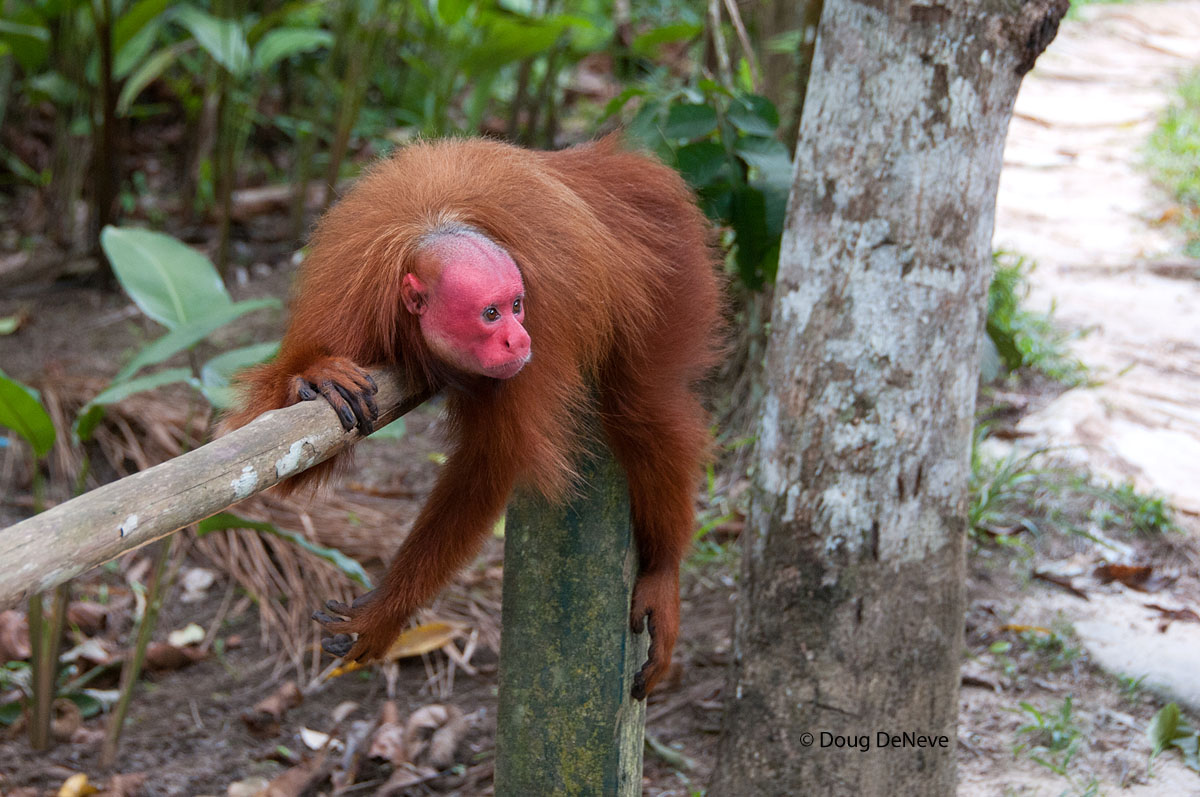

Labels is n3


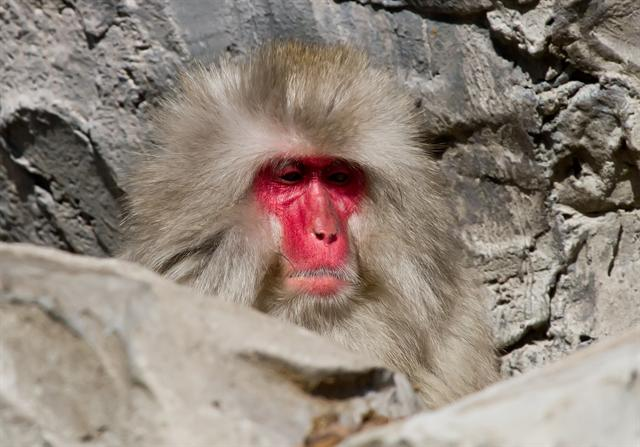

Labels is n4


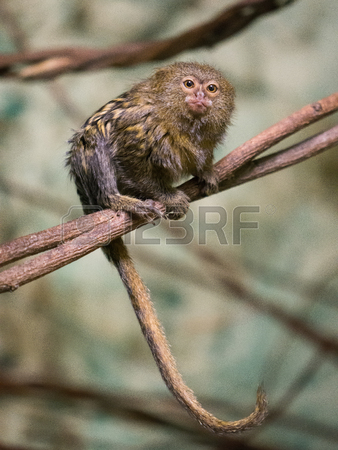

Labels is n5


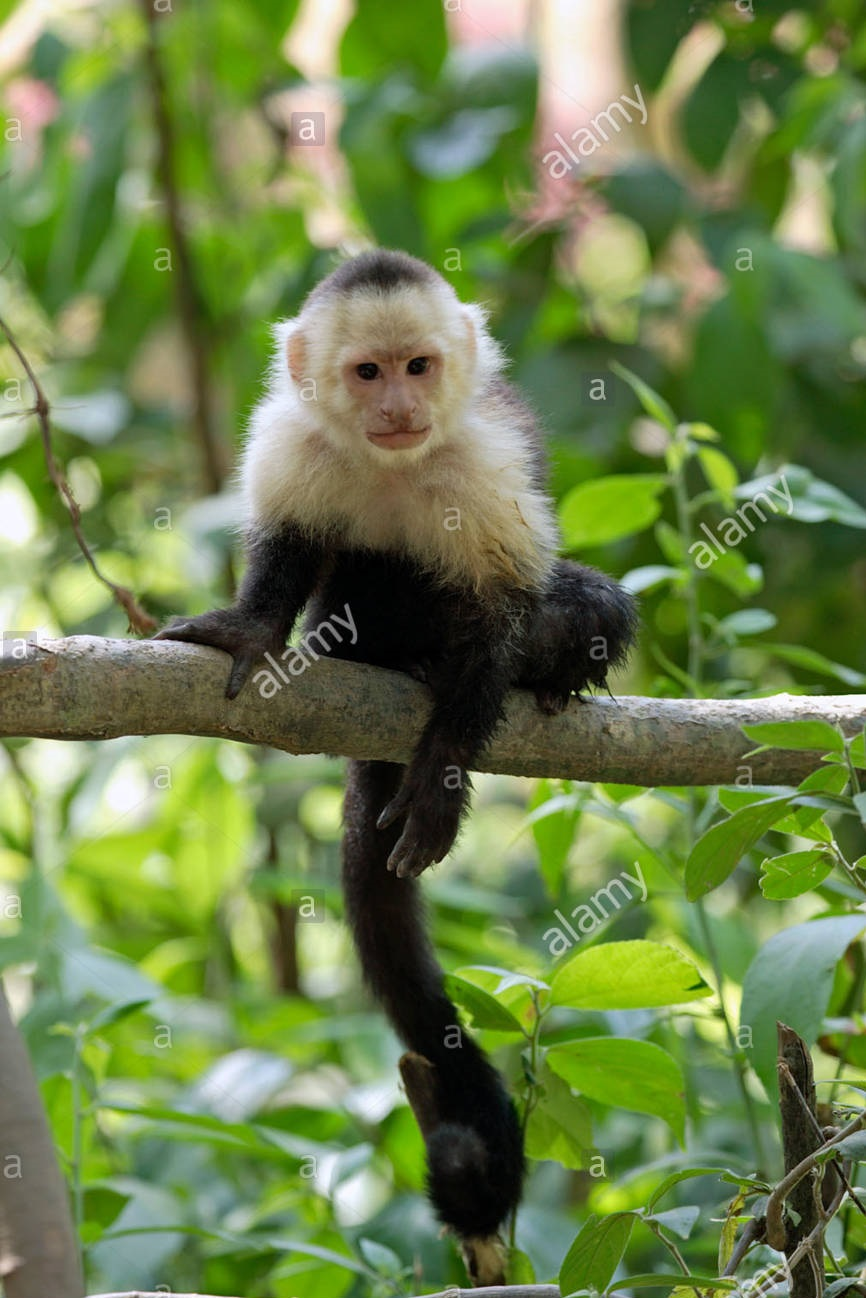

Labels is n6


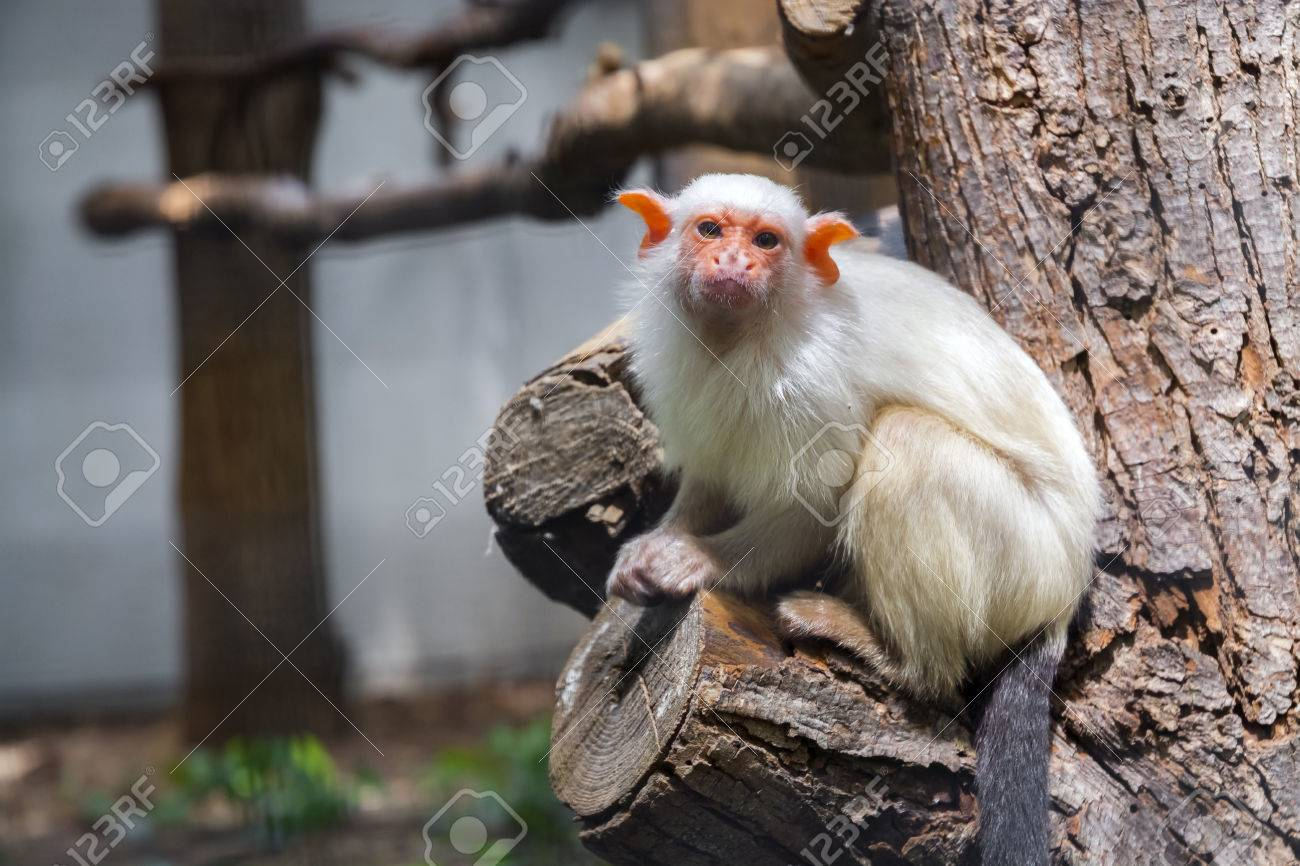

Labels is n7


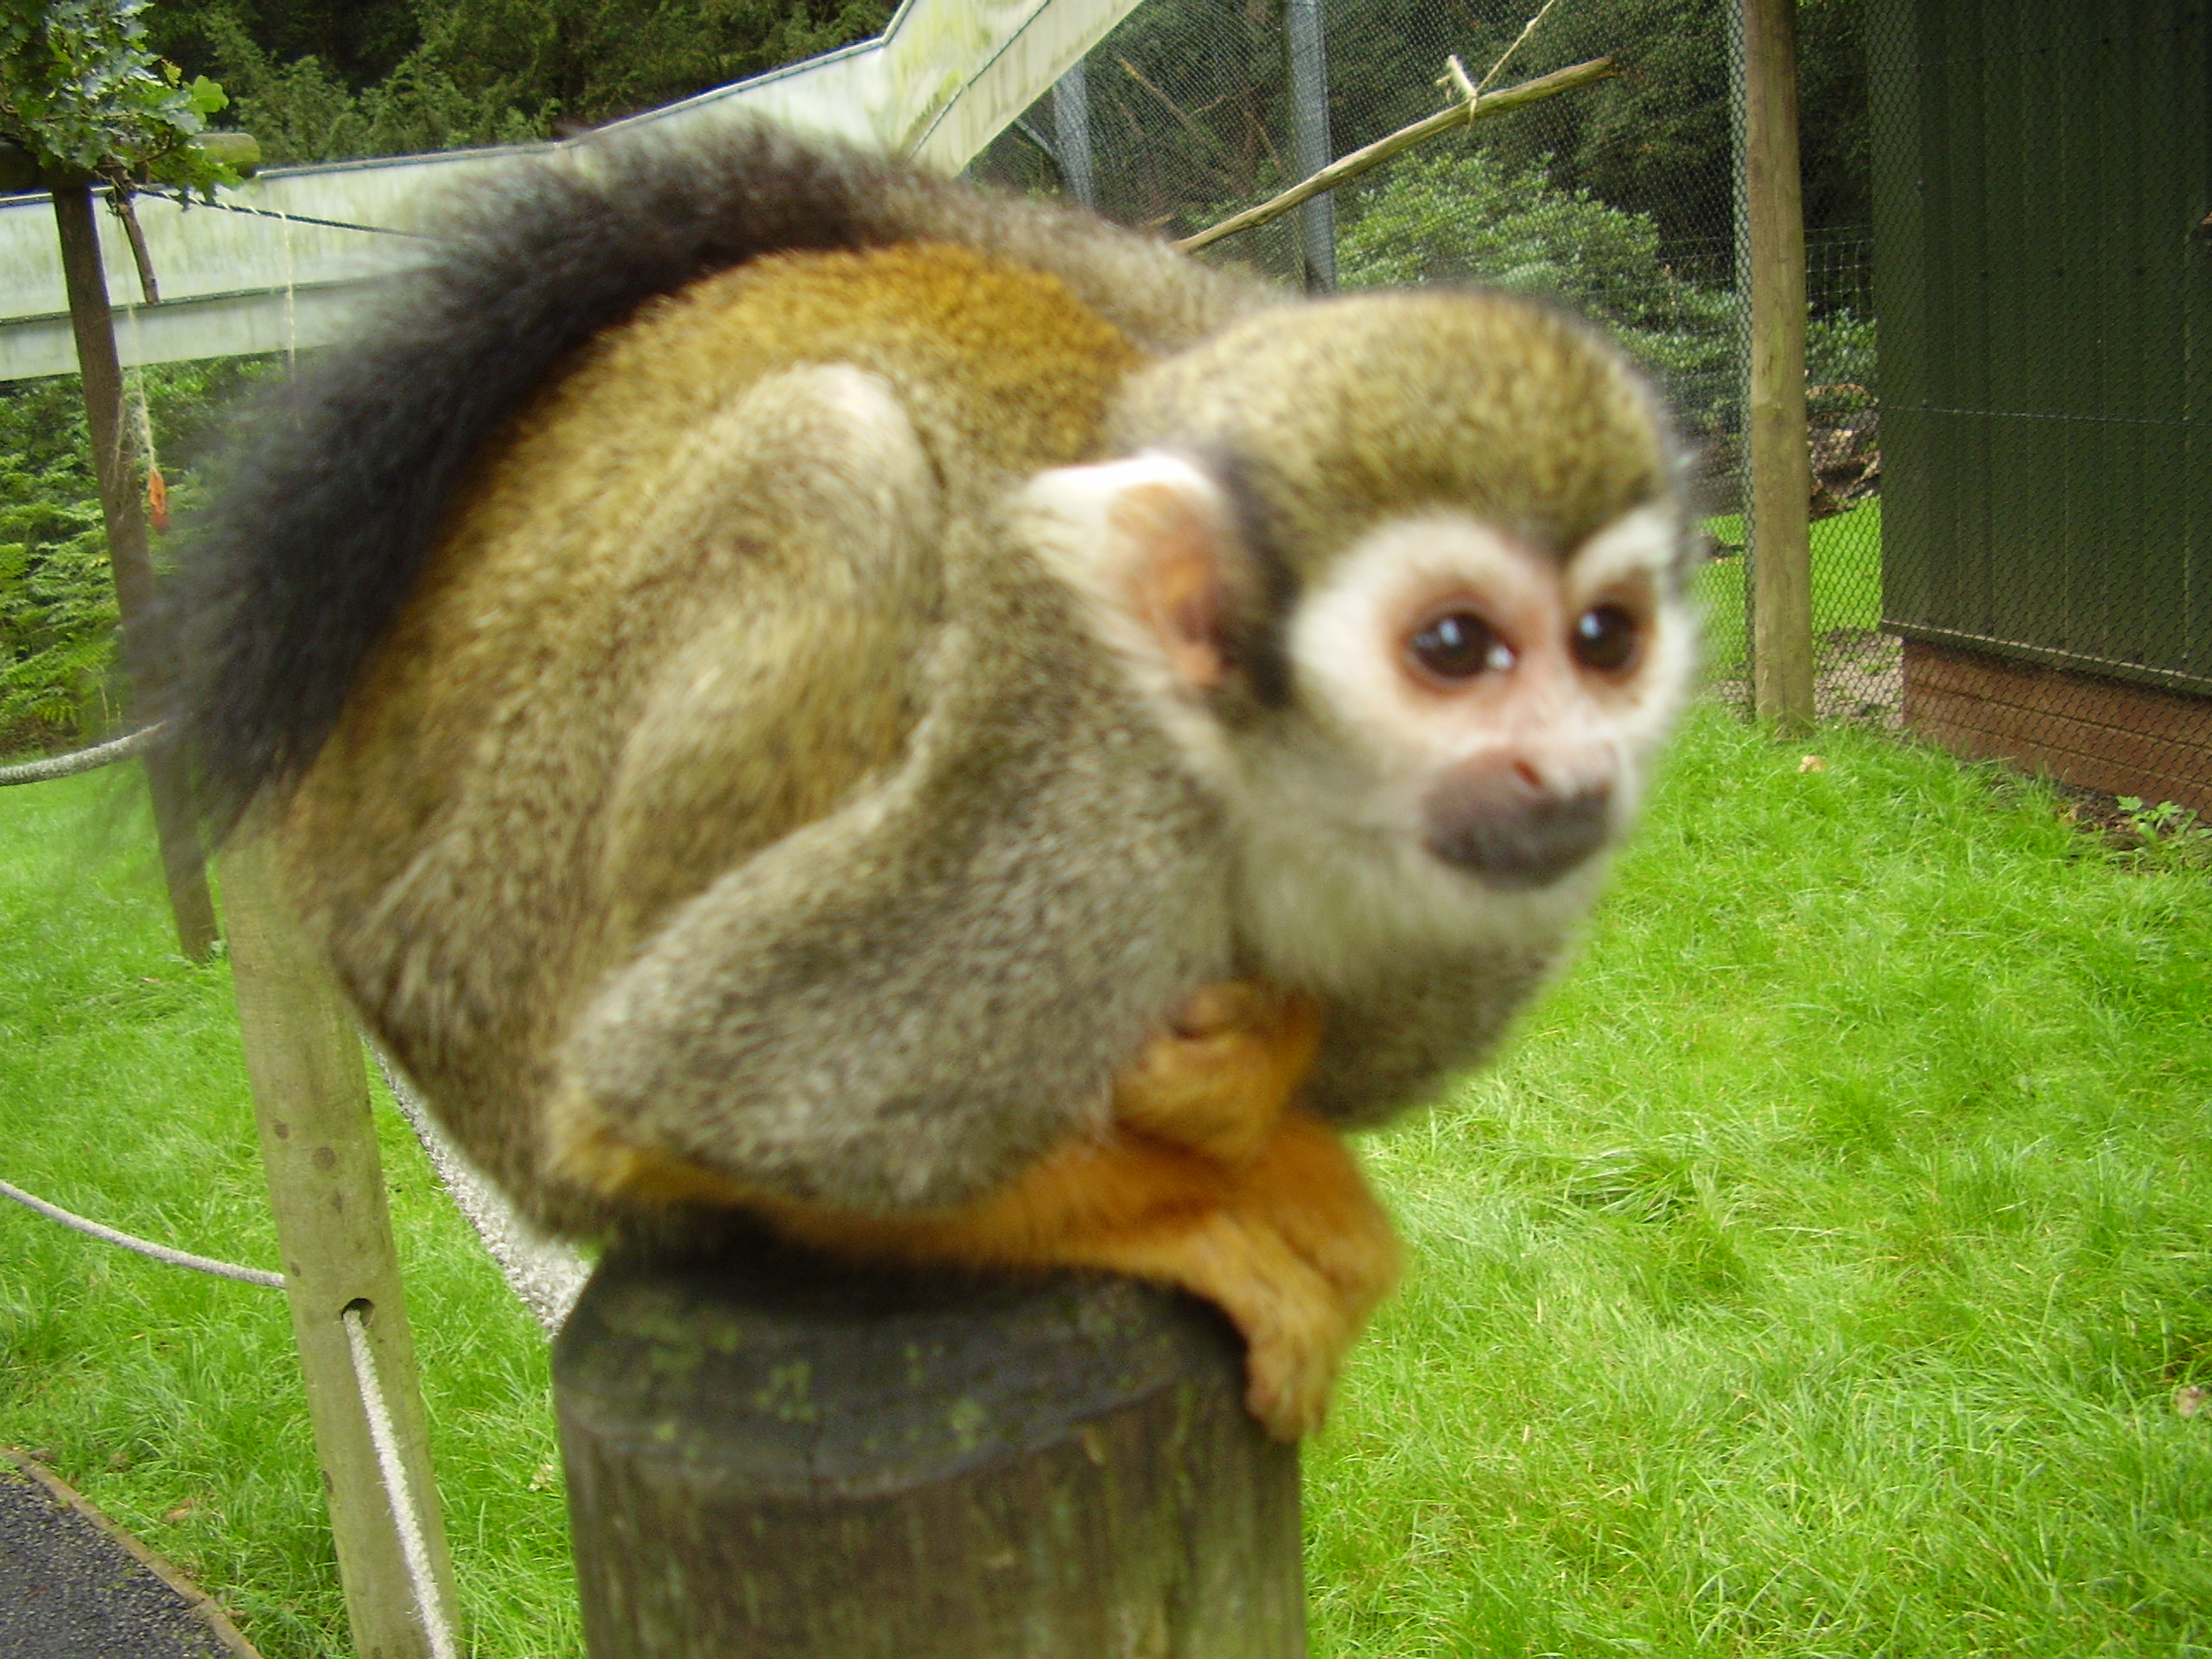

Labels is n8


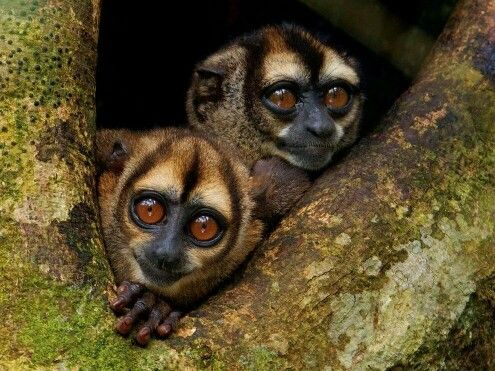

Labels is n9


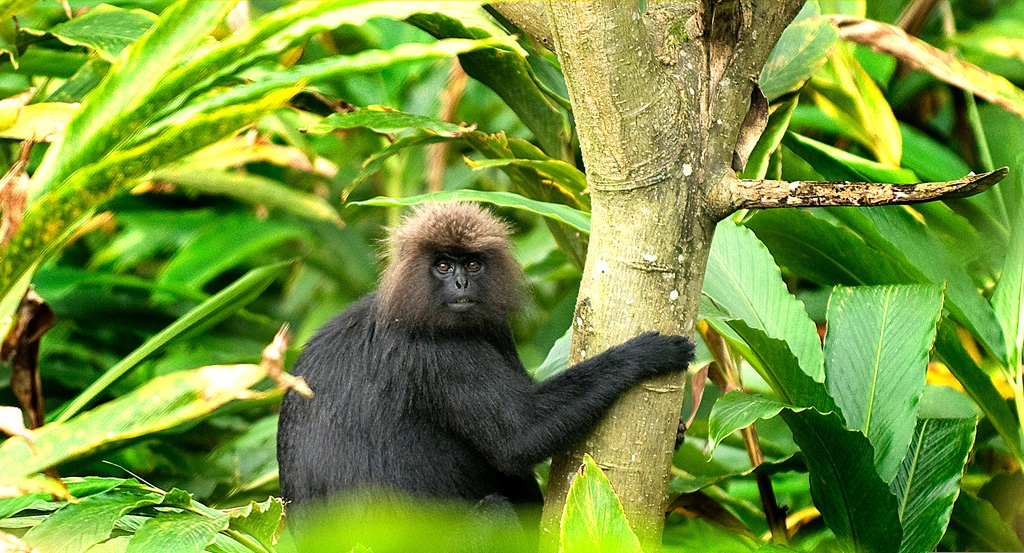

In [ ]:
for few_ids in labels["id"]:
    images_to_show = 5
    image_dir = train_dir + "%s/" % few_ids
    image_name = listdir(image_dir)[0]
    image_path = image_dir  + image_name
    print("Labels is %s" % few_ids)
    display(Image(filename=image_path, width=300, height=300))

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,      # We need to normalize the data
                                    rotation_range=40,      # The rest of params will generate us artificial data by manipulating the image
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True, 
                                    fill_mode='nearest'
                                  )
validation_datagen = ImageDataGenerator(rescale=1./255, # We need to normalize the data
                                  )

train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size= IMG_SIZE, 
                                                    batch_size = BATCH_SIZE, 
                                                    shuffle=True, # By shuffling the images we add some randomness and prevent overfitting
                                                    class_mode="categorical")
validation_generator = validation_datagen.flow_from_directory(validation_dir, 
                                                    target_size= IMG_SIZE, 
                                                    batch_size = BATCH_SIZE, 
                                                    shuffle=True,
                                                    class_mode="categorical")

Found 1098 images belonging to 10 classes.
Found 272 images belonging to 10 classes.


In [ ]:
training_samples = 1097
validation_samples = 272
total_steps = training_samples // BATCH_SIZE

In [ ]:
from keras.applications import vgg16
IMG_SHAPE = IMG_SIZE + (3,)
base_model = vgg16.VGG16(weights='imagenet', include_top=False, input_shape=IMG_SHAPE, pooling="max")

for layer in base_model.layers[:-5]:
        layer.trainable = False
        
for layer in base_model.layers:
    print(layer, layer.trainable)

58892288/58889256 [==============================] - 0s 0us/step
<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f4a23b23668> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f4a23b13f60> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f4a23b130b8> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f4a24712f98> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f4a23b13a20> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f4a246ee710> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f4a246ee978> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f4a23db02b0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f4a246b4630> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f4a246b00f0> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f4a24705550> Fals

In [ ]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 300, 300, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 300, 300, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 300, 300, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 150, 150, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 150, 150, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 150, 150, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 75, 75, 128)       0     

In [ ]:
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.models import Model, Sequential

# Although this part can be done also with the functional API, I found that for this simple models, this becomes more intuitive
transfer_model = Sequential()
for layer in base_model.layers:
    transfer_model.add(layer)
transfer_model.add(Dense(512, activation="relu"))  # Very important to use relu as activation function, search for "vanishing gradiends" :)
transfer_model.add(Dropout(0.5))
transfer_model.add(Dense(10, activation="softmax")) # Finally our activation layer! we use 10 outputs as we have 10 monkey species (labels)

In [ ]:
transfer_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 300, 300, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 300, 300, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 150, 150, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 150, 150, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 150, 150, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 75, 75, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 75, 75, 256)       2

In [ ]:
from keras import optimizers
adam = optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.00001)

transfer_model.compile(loss="categorical_crossentropy",
                      optimizer=adam,
                      metrics=["accuracy"])

In [ ]:
model_history = transfer_model.fit_generator(train_generator, steps_per_epoch=training_samples // BATCH_SIZE,
                                            epochs=25,
                                            validation_data=validation_generator,
                                            validation_steps=validation_samples // BATCH_SIZE)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/25
21/34 [=================>............] - ETA: 6:52 - loss: 2.4706 - accuracy: 0.1338